In [40]:
import os
import cv2
import matplotlib as plt
import seaborn as sns


allowed_ext = ('.jpeg', '.jpg', '.bmp', '.png')
path_blood = 'Blood_Cells_Cancer/Blood_cell_Cancer'
path_brain = 'Data_Brain/Train'
IMG_SIZE = 224

images_blood = []
labels_blood = []



try:
   
        classes_blood = [d for d in os.listdir(path_blood) if os.path.isdir(os.path.join(path_blood, d))]
        print(classes_blood)
        for class_name in classes_blood:
            class_path = os.path.join(path_blood, class_name)
            
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(allowed_ext):
                    img_path = os.path.join(class_path, img_file)
                    img = cv2.imread(img_path)
                    
                    if img is not None:
                        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        images_blood.append(img_resized)
                        labels_blood.append(class_name)

except Exception as e:
    print(f"Une erreur est survenue: {e}")

['Pro-B', 'Benign', 'Pre-B', 'early Pre-B']


In [34]:
len(labels_blood)

3242

<Axes: ylabel='count'>

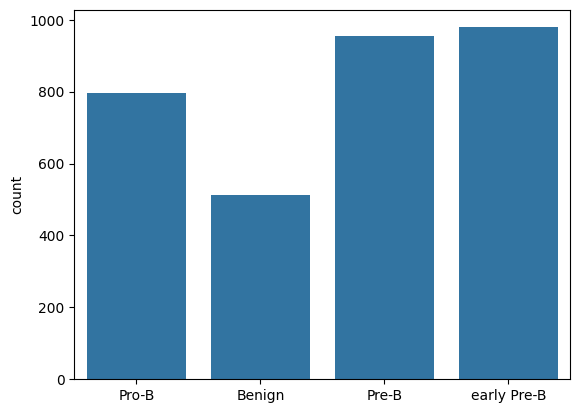

In [41]:
sns.countplot(x = labels_blood)

In [43]:
import numpy as np
unique_classes = np.unique(labels_blood)
fig, axes = plt.subplots(len(unique_classes), 5, figsize=(15, len(unique_classes) * 3))

for i, class_name in enumerate(unique_classes):
    class_indices = np.where(labels == class_name)[0][:5]
    
    for j, idx in enumerate(class_indices):
        ax = axes[i, j] if len(unique_classes) > 1 else axes[j]
        img_rgb = cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis('off')
        if j == 0:
            ax.set_title(f'{class_name}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'